<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula14b_semi_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = X_digits[:1400], X_digits[1400:], y_digits[:1400], y_digits[1400:]

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print(f"Train score: {lr.score(X_train, y_train)}")
print(f"Test score: {lr.score(X_test, y_test)}")

Train score: 0.9992857142857143
Test score: 0.9017632241813602


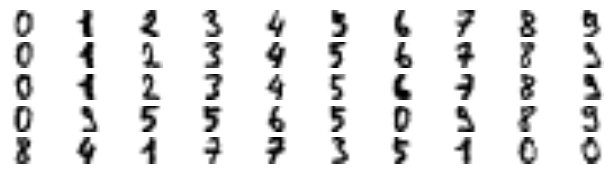

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
for i, digit in enumerate(X_train[:50]):
    plt.subplot(5, 10, i+1)
    plt.imshow(digit.reshape(8, 8), cmap='binary', interpolation="bilinear")
    plt.axis('off')
plt.show()

In [8]:
n_labeled = 50
logreg = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
logreg.fit(X_train[:n_labeled], y_train[:n_labeled])
print(f"Train score: {logreg.score(X_train[:n_labeled], y_train[:n_labeled])}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 1.0
Test score: 0.7657430730478589


In [10]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
X_digit_dist = kmeans.fit_transform(X_train)
representative_digits_idx = X_digit_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digits_idx]

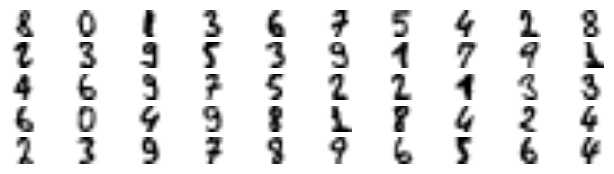

In [11]:
plt.figure(figsize=(8, 2))
for i, digit in enumerate(X_representative_digits):
    plt.subplot(5, 10, i+1)
    plt.imshow(digit.reshape(8, 8), cmap='binary', interpolation="bilinear")
    plt.axis('off')
plt.show()

In [13]:
y_representative_digits = y_train[representative_digits_idx]
print(y_representative_digits.reshape((5,10)))

[[8 0 1 3 6 7 5 4 2 8]
 [2 3 9 5 3 9 1 7 9 1]
 [4 6 9 7 5 2 2 1 3 3]
 [6 0 4 9 8 1 8 4 2 4]
 [2 3 9 7 8 9 6 5 6 4]]


In [14]:
logreg.fit(X_representative_digits, y_representative_digits)
print(f"Train score: {logreg.score(X_representative_digits, y_representative_digits)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 1.0
Test score: 0.8337531486146096


In [15]:
import numpy as np
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [16]:
print((y_train_propagated == y_train).mean())

0.9542857142857143


In [17]:
logreg.fit(X_train, y_train_propagated)
print(f"Train score: {logreg.score(X_representative_digits, y_representative_digits)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 1.0
Test score: 0.8690176322418136


In [18]:
percentile_closest = 80
X_cluster_dist = X_digit_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(50):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
print(len(X_train_partially_propagated))

1111


In [20]:
print((y_train_partially_propagated == y_train[partially_propagated]).mean())

0.9774977497749775


In [21]:
logreg.fit(X_train_partially_propagated, y_train_partially_propagated)
print(f"Train score: {logreg.score(X_train_partially_propagated, y_train_partially_propagated)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.9981998199819982
Test score: 0.8790931989924433
